<a href="https://colab.research.google.com/github/ArushiG11/Yelp_Sentiment_Analysis/blob/main/Yelp_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries and Dependencies

In [4]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

In [5]:
# we are using the pre-trained BERT model to classify the sentiment of input texts without the need to train a model from scratch
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

Collect Reviews

In [6]:
r = requests.get('https://www.yelp.com/biz/fat-cactus-mexican-cantina-new-brunswick?osq=Mexican')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class':regex})
reviews = [result.text for result in results]

In [7]:
reviews

["Great Texmex, good prices for hefty portions. Came here on an almost 100F day and A/C was barely running which kind of subtracted from the experience. Spacious interior and fanciful decorations. Otherwise, service was friendly and quick.- Chicken quesadilla, 4/5: hits the spot, crisp exterior and cheesy inside. Goes great with the guac- 7 layer burrito, 4/5: friend ordered this and said it was hearty and flavorfulthat's all from meeeee",
 "Food is tremendous, but please read the entire review to see what you're in for. I've been here multiple times and personally only had their made to order tacos. They give you a sheet and you check off the ingredients. I have no desire to try anything else because the taco selection is awesome. The Al Pastor carnitas are insane! The first time I had pork belly was incredible, but in subsequent visits it turned out to be very dry and tough to chew so I'm hesitant to check that box again any time soon. Sad face. My family took us here for Father's Da

Load Reviews into DataFrame and give score

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
df = pd.DataFrame(np.array(reviews), columns=['review'])

In [10]:
df['review'].iloc[0]

"Great Texmex, good prices for hefty portions. Came here on an almost 100F day and A/C was barely running which kind of subtracted from the experience. Spacious interior and fanciful decorations. Otherwise, service was friendly and quick.- Chicken quesadilla, 4/5: hits the spot, crisp exterior and cheesy inside. Goes great with the guac- 7 layer burrito, 4/5: friend ordered this and said it was hearty and flavorfulthat's all from meeeee"

In [11]:
# funcion to calculate sentiments
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [13]:
sentiment_score(df['review'].iloc[0])

4

In [16]:
df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))

In [20]:
df

,review,sentiment
0,"Great Texmex, good prices for hefty portions. ...",4
1,"Food is tremendous, but please read the entire...",3
2,1. Chicken Empanadas: The chicken empanadas ar...,4
3,This is a Mexican teataraunt with pretty decor...,4
4,The server was polite but absent. He never cam...,1
5,Fun Mexican Restaurant in New Brunswick that's...,4
6,The Halloween decorations really set the vibe ...,5
7,"I've been here three times, and each visit did...",5
8,Guac and chips very good. Margarita good too. ...,3
9,I think the food is alright in my opinion. Not...,3


In [42]:
df.shape

(10, 2)

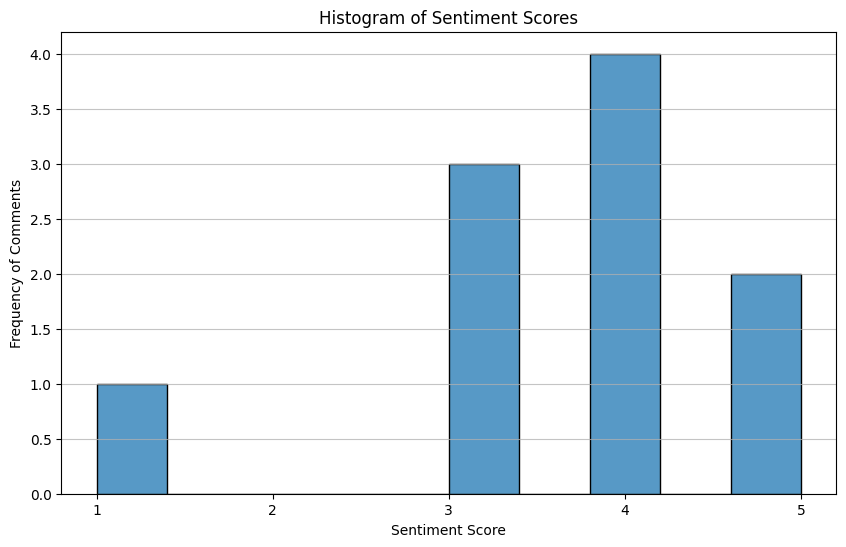

In [47]:
from matplotlib import pyplot as plt
# Using Seaborn for a more aesthetic plot
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=10, kde=False)
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency of Comments')
plt.xticks(range(1, 6))
plt.grid(axis='y', alpha=0.75)
plt.show()